In [227]:
import numpy as np
import matplotlib.pyplot as plt
k = 2
N = 10000
x = np.random.randn(k, N)
x /= np.linalg.norm(x, axis=0, keepdims=True)

In [228]:
from cvxopt import matrix, solvers

In [229]:
def sp(A, k):
    p, _ = A.shape
    c = matrix(-A.ravel())
    Am = matrix(np.eye(p).reshape(1, p ** 2))
    b = matrix(np.ones((1, 1)))
    G = matrix(np.random.randn(p ** 2, p**2))
    h = matrix(np.ones(p ** 2))
    sol = solvers.conelp(c, G, h, A=Am, b=b)
    return sol['x']

In [276]:
import cvxpy as cp
import numpy as np

# Generate a random feasible SOCP.
m = 3
n = 10
p = 5
n_i = 5
np.random.seed(2)
f = np.random.randn(n)
A = []
b = []
c = []
d = []
x0 = np.random.randn(n)
for i in range(m):
    A.append(np.random.randn(n_i, n))
    b.append(np.random.randn(n_i))
    c.append(np.random.randn(n))
    d.append(np.linalg.norm(A[i]@x0 + b, 2) - c[i].T@x0)
F = np.random.randn(p, n)
g = F@x0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
# We use cp.SOC(t, x) to create the SOC constraint ||x||_2 <= t.
soc_constraints = [
      cp.SOC(c[i].T@x + d[i], A[i]@x + b[i]) for i in range(m)
]
prob = cp.Problem(cp.Minimize(f.T@x),
                  soc_constraints + [F@x == g])
prob.solve()

-9.582695716265503

In [277]:
[(c[i].T@x + d[i], A[i]@x + b[i]) for i in range(m)]

[(Expression(AFFINE, UNKNOWN, ()), Expression(AFFINE, UNKNOWN, (5,))),
 (Expression(AFFINE, UNKNOWN, ()), Expression(AFFINE, UNKNOWN, (5,))),
 (Expression(AFFINE, UNKNOWN, ()), Expression(AFFINE, UNKNOWN, (5,)))]

In [331]:
import cvxpy as cp


def sp(A, lbda):
    p, _ = A.shape
    x = cp.Variable(p)
    prob = cp.Problem(cp.Maximize(cp.quad_form(x, A) + lbda * cp.norm1(x)), [cp.SOC(x, cp.Constant(1))])
    prob.solve()
    return x.value

In [330]:
sp(G, 1.)

DCPError: Problem does not follow DCP rules. However, the problem does follow DGP rules. Consider calling this function with `gp=True`.

In [300]:
def sp(A, k):
    p, _ = A.shape
    c = matrix(-A.ravel())
    Am = matrix(np.eye(p).reshape(1, p ** 2))
    b = matrix(np.ones((1, 1)))
    G = matrix(np.random.randn(p ** 2, p**2))
    h = matrix(np.ones(p ** 2))
    sol = solvers.conelp(c, G, h, A=Am, b=b)
    return sol['x']

In [253]:
k = 2
G = np.random.randn(k, k)
G = G.dot(G.T)
x = np.array(sp(G, 1))[:, 0].reshape(k, k)

AttributeError: 'int' object has no attribute 'shape'

In [226]:
np.trace(x)

0.9999999999999922

In [117]:
def sp(G, alpha, max_iter=100):
    G_i = np.linalg.pinv(G)
    p, _ = G.shape
    x = np.ones(p)
    for i in range(max_iter):
        x = np.sign(x) * np.abs(x) ** (alpha - 1)
        x = G_i.dot(x)
        x /= np.sum(np.abs(x) ** alpha) ** (1 / alpha)
        print(x.dot(G_i.dot(x)))
    return x
        

In [127]:
np.linalg.eigvalsh(G)

array([6.14437969e-04, 1.01416086e+00, 1.31353138e+00, 2.99406693e+00,
       5.45397511e+00, 1.05300420e+01, 1.12084235e+01, 1.79393738e+01,
       1.92114856e+01, 2.36238581e+01])

In [129]:
sp(np.linalg.pinv(G), 2, 200)

18.107740805309042
18.749781697106883
18.97520051423207
19.063509808083914
19.102809856555204
19.124483505823306
19.13976348875825
19.152875565390072
19.16573885545987
19.179667172947507
19.196051263057246
19.216729831697656
19.244307335188765
19.282515970353707
19.336647380161935
19.414011261709938
19.524262269860778
19.679239451851554
19.89170935803956
20.172296098185043
20.524406207594772
20.93861116614046
21.390127307705235
21.843099653494292
22.261161182246525
22.61830292753981
22.90379746237747
23.120142645063066
23.27754173583517
23.38869432407242
23.46554859861301
23.51791627561373
23.55324485480635
23.576918632845683
23.592711265392303
23.60321494632119
23.610187112094856
23.614809070491
23.61787040718869
23.61989693119674
23.621237944525763
23.622125123385324
23.622711967650137
23.623100111111206
23.62335681661041
23.62352658694278
23.623638860831512
23.623713109779207
23.62376221176857
23.62379468359991
23.623816157671314
23.62383035878821
23.623839750211737
23.6238459609225

array([-0.16267914, -0.47880124, -0.05331004,  0.38952694,  0.37852062,
       -0.29720779,  0.45617844, -0.32991637,  0.18884932, -0.07411946])

1.8025009252216604
1.8025009252142632


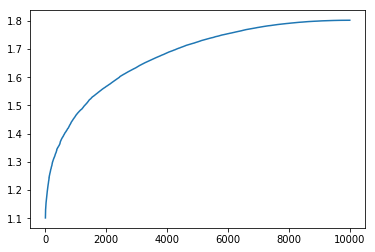

In [45]:
alpha = 0.3

s = np.sum(np.abs(x) ** alpha, axis=0)
plt.plot(np.sort(s))
print(k ** (1 - alpha / 2))
print(s.max())

In [41]:
alpha = 0.1
x = np.random.randn(k, N)
s = np.sum(np.abs(x) ** alpha, axis=0) ** (1 / alpha)
x /= s
x *= k ** (1 / alpha - 1 / 2)


In [42]:
s2

array([[1.30159872e+03, 7.31923082e+02, 5.98779747e+02, ...,
        1.02279515e+00, 5.65336135e+02, 7.04200661e+02]])

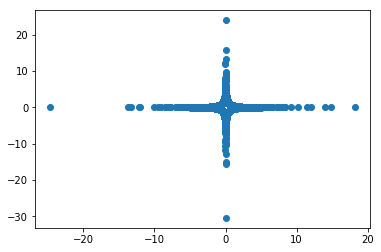

In [43]:
plt.scatter(x[0], x[1])